## Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')



### Set up plotting style


In [3]:
plt.style.use('default')
sns.set_palette("husl")

### STEP 1: CREATE SAMPLE SALES DATA
Create sample sales data (you can replace this with loading your own CSV)

In [4]:
np.random.seed(42)

# Generate sample data
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
regions = ['North', 'South', 'East', 'West', 'Central']
sales_reps = ['Alice Johnson', 'Bob Smith', 'Carol Davis', 'David Wilson', 'Eva Brown']


In [5]:
n_records = 2000
data = []

In [6]:
for _ in range(n_records):
    date = np.random.choice(dates)
    product = np.random.choice(products)
    region = np.random.choice(regions)
    sales_rep = np.random.choice(sales_reps)
    quantity = np.random.randint(1, 50)
    unit_price = np.random.uniform(10, 500)
    total_sales = quantity * unit_price
    
    data.append({
        'Date': date,
        'Product': product,
        'Region': region,
        'Sales_Rep': sales_rep,
        'Quantity': quantity,
        'Unit_Price': unit_price,
        'Total_Sales': total_sales
    })

In [7]:
df = pd.DataFrame(data)


In [8]:
df.to_csv('sales_data.csv', index=False)
print("Sample data created and saved!")

Sample data created and saved!


### STEP 2: LOAD AND EXPLORE THE DATA


In [9]:
df = pd.read_csv('sales_data.csv')

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year

In [16]:
sales_by_product = df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False)
sales_by_region = df.groupby('Region')['Total_Sales'].sum().sort_values(ascending=False)
avg_sales_by_rep = df.groupby('Sales_Rep')['Total_Sales'].mean().sort_values(ascending=False)
monthly_sales = df.groupby('Month')['Total_Sales'].sum()
quarterly_sales = df.groupby('Quarter')['Total_Sales'].sum()
product_region_sales = df.groupby(['Product', 'Region'])['Total_Sales'].sum().unstack(fill_value=0)
top_combinations = df.groupby(['Product', 'Region'])['Total_Sales'].sum().sort_values(ascending=False).head(10)


#### 1. Sales by Product (Bar Chart)


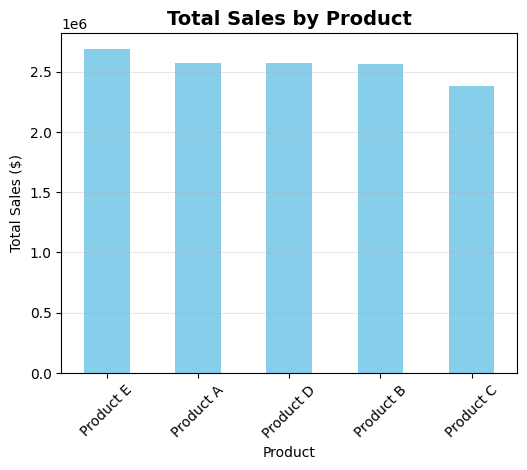

In [14]:
fig = plt.figure(figsize=(20, 15))

plt.subplot(3, 3, 1)
sales_by_product.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product', fontsize=14, fontweight='bold')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

#### 2. Sales by Region (Pie Chart)


Text(0, 0.5, '')

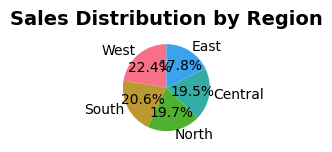

In [17]:
plt.subplot(3, 3, 2)
sales_by_region.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Region', fontsize=14, fontweight='bold')
plt.ylabel('')

#### 3. Monthly Sales Trend (Line Chart)


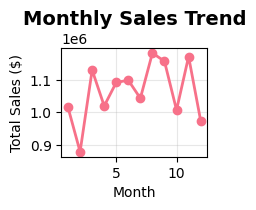

In [18]:
plt.subplot(3, 3, 3)
monthly_sales.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True, alpha=0.3)

#### 4. Average Sales by Sales Rep (Horizontal Bar Chart)


Text(0, 0.5, 'Sales Representative')

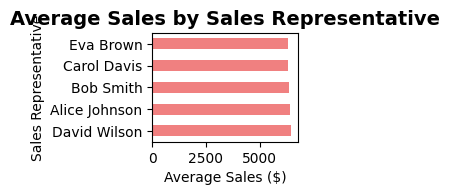

In [19]:
plt.subplot(3, 3, 4)
avg_sales_by_rep.plot(kind='barh', color='lightcoral')
plt.title('Average Sales by Sales Representative', fontsize=14, fontweight='bold')
plt.xlabel('Average Sales ($)')
plt.ylabel('Sales Representative')

#### 5. Quarterly Performance (Bar Chart)


(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

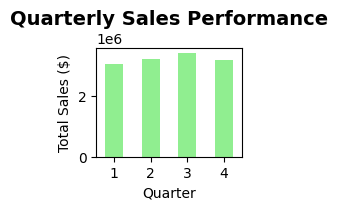

In [20]:
plt.subplot(3, 3, 5)
quarterly_sales.plot(kind='bar', color='lightgreen')
plt.title('Quarterly Sales Performance', fontsize=14, fontweight='bold')
plt.xlabel('Quarter')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)

#### 6. Sales Distribution (Histogram)


Text(0, 0.5, 'Frequency')

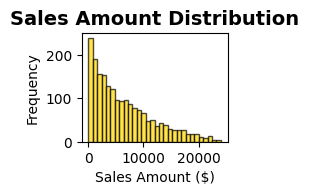

In [21]:
plt.subplot(3, 3, 6)
plt.hist(df['Total_Sales'], bins=30, color='gold', alpha=0.7, edgecolor='black')
plt.title('Sales Amount Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Sales Amount ($)')
plt.ylabel('Frequency')

#### 7. Top 10 Product-Region Combinations


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(Product E, West)'),
  Text(1, 0, '(Product B, West)'),
  Text(2, 0, '(Product D, South)'),
  Text(3, 0, '(Product D, Central)'),
  Text(4, 0, '(Product C, North)'),
  Text(5, 0, '(Product D, West)'),
  Text(6, 0, '(Product A, North)'),
  Text(7, 0, '(Product A, Central)'),
  Text(8, 0, '(Product E, South)'),
  Text(9, 0, '(Product E, East)')])

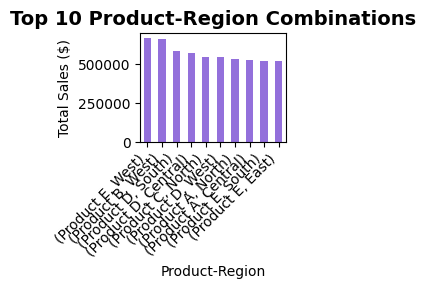

In [24]:
plt.subplot(3, 3, 7)
top_combinations.plot(kind='bar', color='mediumpurple')
plt.title('Top 10 Product-Region Combinations', fontsize=14, fontweight='bold')
plt.xlabel('Product-Region')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')

#### 8. Heatmap of Product Performance by Region


Text(225.781045751634, 0.5, 'Product')

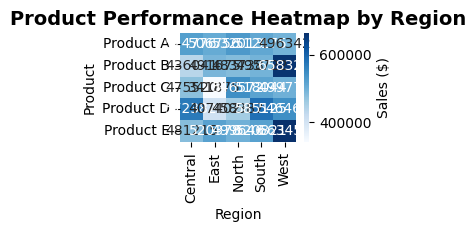

In [25]:
plt.subplot(3, 3, 8)
sns.heatmap(product_region_sales, annot=True, fmt='.0f', cmap='Blues', cbar_kws={'label': 'Sales ($)'})
plt.title('Product Performance Heatmap by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Product')

#### 9. Box Plot of Sales by Product


(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'Product A'),
  Text(2, 0, 'Product B'),
  Text(3, 0, 'Product C'),
  Text(4, 0, 'Product D'),
  Text(5, 0, 'Product E')])

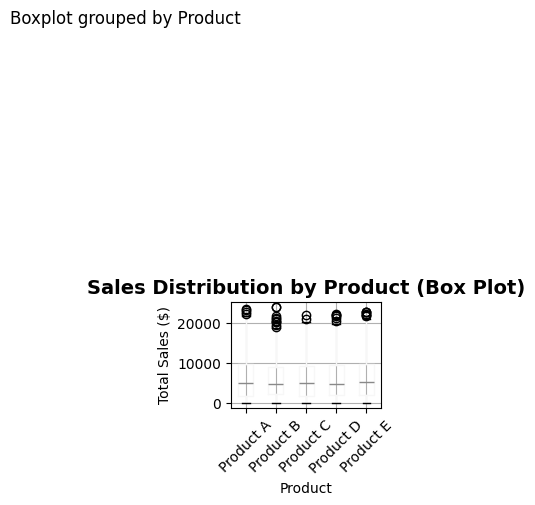

In [26]:
plt.subplot(3, 3, 9)
df.boxplot(column='Total_Sales', by='Product', ax=plt.gca())
plt.title('Sales Distribution by Product (Box Plot)', fontsize=14, fontweight='bold')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)

In [28]:
total_revenue = df['Total_Sales'].sum()
avg_order_value = df['Total_Sales'].mean()
total_units_sold = df['Quantity'].sum()
avg_unit_price = df['Unit_Price'].mean()

In [29]:
print(f"\nKEY PERFORMANCE INDICATORS:")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Order Value: ${avg_order_value:.2f}")
print(f"Total Units Sold: {total_units_sold:,}")
print(f"Average Unit Price: ${avg_unit_price:.2f}")


KEY PERFORMANCE INDICATORS:
Total Revenue: $12,774,624.10
Average Order Value: $6387.31
Total Units Sold: 50,692
Average Unit Price: $255.27


In [30]:
best_product = sales_by_product.index[0]
best_region = sales_by_region.index[0]
best_sales_rep = avg_sales_by_rep.index[0]

In [31]:
print(f"\nTOP PERFORMERS:")
print(f"Best Product: {best_product} (${sales_by_product[best_product]:,.2f})")
print(f"Best Region: {best_region} (${sales_by_region[best_region]:,.2f})")
print(f"Best Sales Rep: {best_sales_rep} (${avg_sales_by_rep[best_sales_rep]:.2f} avg)")



TOP PERFORMERS:
Best Product: Product E ($2,685,511.56)
Best Region: West ($2,864,360.56)
Best Sales Rep: David Wilson ($6463.10 avg)


In [32]:
q1_sales = quarterly_sales[1]
q4_sales = quarterly_sales[4]
growth_rate = ((q4_sales - q1_sales) / q1_sales) * 100

In [33]:
print(f"\nGROWTH ANALYSIS:")
print(f"Q1 Sales: ${q1_sales:,.2f}")
print(f"Q4 Sales: ${q4_sales:,.2f}")
print(f"Growth Rate: {growth_rate:.1f}%")



GROWTH ANALYSIS:
Q1 Sales: $3,023,720.31
Q4 Sales: $3,154,033.80
Growth Rate: 4.3%


In [34]:
summary_stats = pd.DataFrame({
    'Metric': ['Total Revenue', 'Average Order Value', 'Total Units Sold', 'Average Unit Price'],
    'Value': [f"${total_revenue:,.2f}", f"${avg_order_value:.2f}", f"{total_units_sold:,}", f"${avg_unit_price:.2f}"]
})

In [35]:

print(f"\nSUMMARY TABLE:")
print(summary_stats)


SUMMARY TABLE:
                Metric           Value
0        Total Revenue  $12,774,624.10
1  Average Order Value        $6387.31
2     Total Units Sold          50,692
3   Average Unit Price         $255.27


In [36]:
sales_by_product.to_csv('sales_by_product.csv', header=['Total_Sales'])
sales_by_region.to_csv('sales_by_region.csv', header=['Total_Sales'])
monthly_sales.to_csv('monthly_sales.csv', header=['Total_Sales'])
summary_stats.to_csv('summary_statistics.csv', index=False)

print(f"\nAnalysis complete! Results exported to CSV files.")
print(f"Files created:")
print(f"- sales_by_product.csv")
print(f"- sales_by_region.csv") 
print(f"- monthly_sales.csv")
print(f"- summary_statistics.csv")


Analysis complete! Results exported to CSV files.
Files created:
- sales_by_product.csv
- sales_by_region.csv
- monthly_sales.csv
- summary_statistics.csv


In [37]:
def analyze_product(product_name):
    """Analyze specific product performance"""
    product_data = df[df['Product'] == product_name]
    
    print(f"\n=== ANALYSIS FOR {product_name} ===")
    print(f"Total Sales: ${product_data['Total_Sales'].sum():,.2f}")
    print(f"Units Sold: {product_data['Quantity'].sum():,}")
    print(f"Average Price: ${product_data['Unit_Price'].mean():.2f}")
    print(f"Best Region: {product_data.groupby('Region')['Total_Sales'].sum().idxmax()}")
    
    return product_data

def analyze_region(region_name):
    """Analyze specific region performance"""
    region_data = df[df['Region'] == region_name]
    
    print(f"\n=== ANALYSIS FOR {region_name} REGION ===")
    print(f"Total Sales: ${region_data['Total_Sales'].sum():,.2f}")
    print(f"Units Sold: {region_data['Quantity'].sum():,}")
    print(f"Best Product: {region_data.groupby('Product')['Total_Sales'].sum().idxmax()}")
    print(f"Best Sales Rep: {region_data.groupby('Sales_Rep')['Total_Sales'].sum().idxmax()}")
    
    return region_data

In [39]:

product_a_analysis = analyze_product('Product A')


north_region_analysis = analyze_region('North')


=== ANALYSIS FOR Product A ===
Total Sales: $2,572,061.93
Units Sold: 9,805
Average Price: $260.33
Best Region: North

=== ANALYSIS FOR North REGION ===
Total Sales: $2,520,356.20
Units Sold: 10,556
Best Product: Product C
Best Sales Rep: Alice Johnson
